In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [27]:
dfCapi = pd.read_csv('final.csv',index_col=0)

In [28]:
dfCapi.loc[:,"place_name"] = dfCapi.apply(lambda x: x.place_name.lower(), axis=1)

In [29]:
dfCapi.columns

Index(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'operation', 'property_type',
       'place_name', 'place_with_parent_names', 'country_name', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'rooms_reg', 'price_m2_sin_out', 'geometry',
       'distancia_subte', 'cerca_lejos', 'index_original', 'balcón', 'baulera',
       'cochera', 'gimnasio', 'gym', 'hidromasaje', 'jacuzzi', 'laundry',
       'lavadero', 'luminoso', 'mármol', 'parrilla', 'patio', 'patios',
       'pileta', 'piscina', 'seguridad', 'solarium', 'sum', 'terraza',
       'vigilancia', 'suma_amenities'],
      dtype='object')

In [30]:
categoricals = ['property_type']
enc = OneHotEncoder(drop='first')
X_OHE = dfCapi[categoricals]
enc.fit(X_OHE)
enc.categories_

dummies = enc.transform(X_OHE).toarray()
dummies_df = pd.DataFrame(dummies)
col_names = [enc.categories_[i] for i in range(len(categoricals)) ]
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
dummies_df.columns = col_names_drop_first

In [31]:
dfCapi = pd.concat([dfCapi, dummies_df], axis = 1)

In [32]:
categoricals = ['place_name']
enc = OneHotEncoder(drop='first')
X_OHE = dfCapi[categoricals]
enc.fit(X_OHE)
enc.categories_

dummies = enc.transform(X_OHE).toarray()
dummies_df = pd.DataFrame(dummies)
col_names = [enc.categories_[i] for i in range(len(categoricals)) ]
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
dummies_df.columns = col_names_drop_first

In [33]:
dfCapi = pd.concat([dfCapi, dummies_df], axis = 1)

In [34]:
feature_cols = ['balcón', 'baulera', 'cochera',
       'gimnasio', 'gym', 'hidromasaje', 'jacuzzi', 'laundry', 'lavadero',
       'luminoso', 'mármol', 'parrilla', 'patio', 'patios', 'pileta',
       'piscina', 'seguridad', 'solarium', 'sum', 'terraza', 'vigilancia']

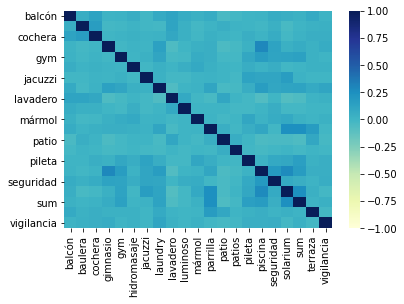

In [35]:
sns.heatmap(dfCapi[feature_cols].corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

**Checkeamos correlaciones entre variables**

Text(0.5, 1.0, 'Correlación entre variables - Continuas y discretas')

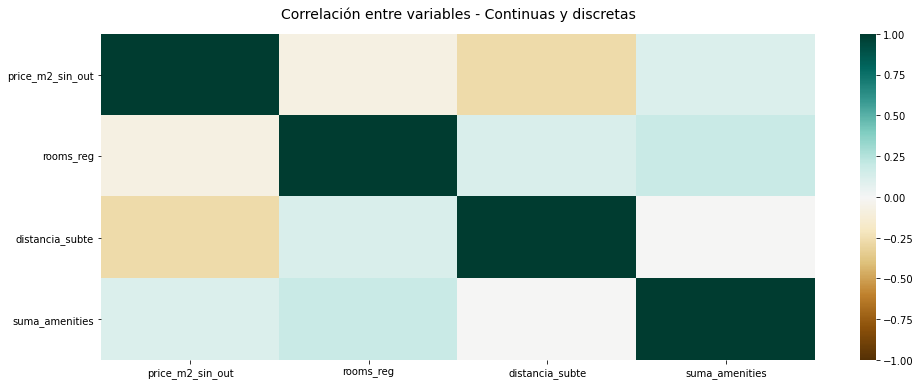

In [36]:
plt.figure(figsize=(16, 6))
dfCapi1 = dfCapi.loc[:,['price_m2_sin_out', 'rooms_reg', 'distancia_subte','suma_amenities']]
dfCapi1.corr()  
heatmap = sns.heatmap(dfCapi1.corr(), vmin=-1, vmax=1,cmap='BrBG')
heatmap.set_title('Correlación entre variables - Continuas y discretas', fontdict={'fontsize':14}, pad=16)

Text(0.5, 1.0, 'Correlación entre variables - Amenities')

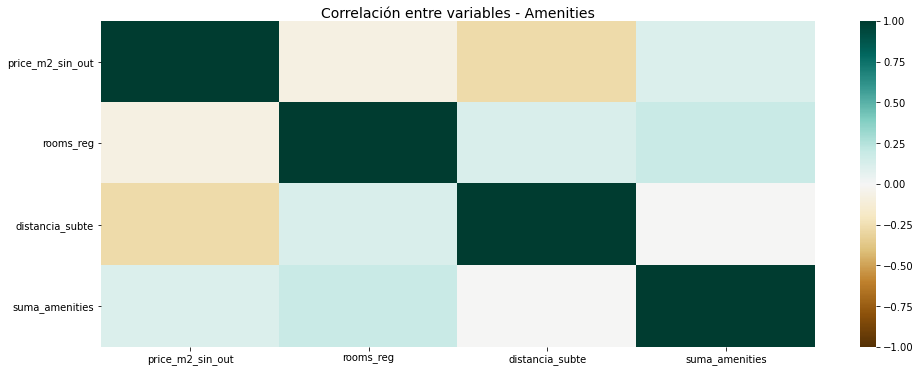

In [37]:
plt.figure(figsize=(16, 6))
dfCapi2 = dfCapi.loc[:,['price_m2_sin_out', 'balcón', 'baulera', 'cochera','gimnasio', 'parrilla','piscina']]
dfCapi2.corr()  
heatmap = sns.heatmap(dfCapi1.corr(), vmin=-1, vmax=1,cmap='BrBG')
heatmap.set_title('Correlación entre variables - Amenities', fontdict={'fontsize':14}, pad=1)

In [38]:
# Creamos el Array 'features_cols' para almacenar los features que usaremos para entrenar el modelo.
feature_cols = ['rooms_reg','balcón', 'baulera', 'cochera',
       'gimnasio', 'gym', 'hidromasaje', 'jacuzzi', 'laundry', 'lavadero',
       'luminoso', 'mármol', 'parrilla', 'patio', 'patios', 'pileta',
       'piscina', 'seguridad', 'solarium', 'sum', 'terraza', 'vigilancia','apartment','house', 'agronomía', 'almagro', 'balvanera', 'barracas',
        'barrio norte', 'belgrano', 'boca', 'boedo', 'caballito',
        'capital federal', 'catalinas', 'centro / microcentro',
        'chacarita', 'coghlan', 'colegiales', 'congreso', 'constitución',
        'flores', 'floresta', 'las cañitas', 'liniers', 'mataderos',
        'monserrat', 'monte castro', 'nuñez', 'once', 'palermo',
        'palermo chico', 'palermo hollywood', 'palermo soho',
        'palermo viejo', 'parque avellaneda', 'parque centenario',
        'parque chacabuco', 'parque chas', 'parque patricios', 'paternal',
        'pompeya', 'puerto madero', 'recoleta', 'retiro', 'saavedra',
        'san cristobal', 'san nicolás', 'san telmo', 'tribunales',
        'velez sarsfield', 'versalles', 'villa crespo', 'villa del parque',
        'villa devoto', 'villa general mitre', 'villa lugano',
        'villa luro', 'villa ortuzar', 'villa pueyrredón', 'villa real',
        'villa riachuelo', 'villa santa rita', 'villa soldati',
        'villa urquiza', 'cerca_lejos', 'distancia_subte', 'suma_amenities']

# Regresion lineal multiple

sklearn

In [39]:
# Probamos distintas variables:
## Modelo 1: amenities
## Modelo 2: amenities, rooms, tipos de propiedad, 
## Modelo 3: amenities, rooms, tipos de propiedad, barrios
## Modelo 4: amenities, rooms, tipos de propiedad, barrios, suma amenities, distancia al subte

In [40]:
# Modelo 1: solo amenities
feature_cols1 = ['balcón', 'baulera', 'cochera',
       'gimnasio', 'gym', 'hidromasaje', 'jacuzzi', 'laundry', 'lavadero',
       'luminoso', 'mármol', 'parrilla', 'patio', 'patios', 'pileta',
       'piscina', 'seguridad', 'solarium', 'sum', 'terraza', 'vigilancia']
X1 = dfCapi[feature_cols1]
y1 = dfCapi['price_m2_sin_out']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.35, random_state=10)
lm = linear_model.LinearRegression()

model_lm1 = lm.fit(X1_train, y1_train)
y_pred_lm1= model_lm1.predict(X1_test)

In [41]:
#Evaluo su rendimiento con el train
print('Score del model_lm1:', model_lm1.score(X1_train, y1_train))

#Evaluo su rendimiento con el test
print ('MAE:', metrics.mean_absolute_error(y1_test, y_pred_lm1))
print ('MSE:', metrics.mean_squared_error(y1_test, y_pred_lm1))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred_lm1)))
print ('R2:', metrics.r2_score(y1_test, y_pred_lm1))

Score del model_lm1: 0.12133509879903914
MAE: 479.84152910149186
MSE: 375318.14963632135
RMSE: 612.632148712685
R2: 0.11093937178627111


In [42]:
#Check
X1.columns.value_counts()[X1.columns.value_counts()>1]

Series([], dtype: int64)

In [43]:
# Modelo 2: amenities, rooms y tipos de propiedad
feature_cols2 = ['balcón', 'baulera', 'cochera','gimnasio', 'gym', 'hidromasaje', 'jacuzzi', 'laundry', 'lavadero',
       'luminoso', 'mármol', 'parrilla', 'patio', 'patios', 'pileta','piscina', 'seguridad', 'solarium', 'sum', 'terraza', 'vigilancia',
    'rooms_reg','apartment','house','store']
X2 = dfCapi[feature_cols2]
y2 = dfCapi['price_m2_sin_out']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.35, random_state=10)
lm = linear_model.LinearRegression()

model_lm2 = lm.fit(X2_train, y2_train)
y_pred_lm2= model_lm2.predict(X2_test)

In [44]:
#Evaluo su rendimiento con el train
print('Score del model_lm2:', model_lm2.score(X2_train, y2_train))

#Evaluo su rendimiento con el test
print ('MAE:', metrics.mean_absolute_error(y2_test, y_pred_lm2))
print ('MSE:', metrics.mean_squared_error(y2_test, y_pred_lm2))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred_lm2)))
print ('R2:', metrics.r2_score(y2_test, y_pred_lm2))

Score del model_lm2: 0.18643871590663175
MAE: 461.69658239282546
MSE: 348354.5843569244
RMSE: 590.2157100221277
R2: 0.17481116777964711


In [45]:
#Check
X2.columns.value_counts()[X2.columns.value_counts()>1]

Series([], dtype: int64)

In [46]:
# Modelo 3: amenities, rooms, tipos de propiedad, barrios
feature_cols3 = ['balcón', 'baulera', 'cochera','gimnasio', 'gym', 'hidromasaje', 'jacuzzi', 'laundry', 'lavadero',
       'luminoso', 'mármol', 'parrilla', 'patio', 'patios', 'pileta','piscina', 'seguridad', 'solarium', 'sum', 'terraza', 'vigilancia',
    'rooms_reg','apartment','house','store','agronomía', 'almagro', 'balvanera', 'barracas',
        'barrio norte', 'belgrano', 'boca', 'boedo', 'caballito',
        'capital federal', 'catalinas', 'centro / microcentro',
        'chacarita', 'coghlan', 'colegiales', 'congreso', 'constitución',
        'flores', 'floresta', 'las cañitas', 'liniers', 'mataderos',
        'monserrat', 'monte castro', 'nuñez', 'once', 'palermo',
        'palermo chico', 'palermo hollywood', 'palermo soho',
        'palermo viejo', 'parque avellaneda', 'parque centenario',
        'parque chacabuco', 'parque chas', 'parque patricios', 'paternal',
        'pompeya', 'puerto madero', 'recoleta', 'retiro', 'saavedra',
        'san cristobal', 'san nicolás', 'san telmo', 'tribunales',
        'velez sarsfield', 'versalles', 'villa crespo', 'villa del parque',
        'villa devoto', 'villa general mitre', 'villa lugano',
        'villa luro', 'villa ortuzar', 'villa pueyrredón', 'villa real',
        'villa riachuelo', 'villa santa rita', 'villa soldati',
        'villa urquiza']
X3 = dfCapi[feature_cols3]
y3 = dfCapi['price_m2_sin_out']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.35, random_state=10)
lm = linear_model.LinearRegression()

model_lm3 = lm.fit(X3_train, y3_train)
y_pred_lm3= model_lm3.predict(X3_test)

In [47]:
#Evaluo su rendimiento con el train
print('Score del model_lm3:', model_lm3.score(X3_train, y3_train))

#Evaluo su rendimiento con el test
print ('MAE:', metrics.mean_absolute_error(y3_test, y_pred_lm3))
print ('MSE:', metrics.mean_squared_error(y3_test, y_pred_lm3))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, y_pred_lm3)))
print ('R2:', metrics.r2_score(y3_test, y_pred_lm3))

Score del model_lm3: 0.5808716487373049
MAE: 289.08320467384317
MSE: 177878.91973331256
RMSE: 421.7569439064549
R2: 0.5786370995452284


In [48]:
#Check
X3.columns.value_counts()[X3.columns.value_counts()>1]

Series([], dtype: int64)

In [49]:
# Modelo 4: amenities, rooms, tipos de propiedad, barrios
feature_cols4 = ['balcón', 'baulera', 'cochera','gimnasio', 'gym', 'hidromasaje', 'jacuzzi', 'laundry', 'lavadero',
       'luminoso', 'mármol', 'parrilla', 'patio', 'patios', 'pileta','piscina', 'seguridad', 'solarium', 'sum', 'terraza', 'vigilancia',
    'rooms_reg','apartment','house','store','agronomía', 'almagro', 'balvanera', 'barracas',
        'barrio norte', 'belgrano', 'boca', 'boedo', 'caballito',
        'capital federal', 'catalinas', 'centro / microcentro',
        'chacarita', 'coghlan', 'colegiales', 'congreso', 'constitución',
        'flores', 'floresta', 'las cañitas', 'liniers', 'mataderos',
        'monserrat', 'monte castro', 'nuñez', 'once', 'palermo',
        'palermo chico', 'palermo hollywood', 'palermo soho',
        'palermo viejo', 'parque avellaneda', 'parque centenario',
        'parque chacabuco', 'parque chas', 'parque patricios', 'paternal',
        'pompeya', 'puerto madero', 'recoleta', 'retiro', 'saavedra',
        'san cristobal', 'san nicolás', 'san telmo', 'tribunales',
        'velez sarsfield', 'versalles', 'villa crespo', 'villa del parque',
        'villa devoto', 'villa general mitre', 'villa lugano',
        'villa luro', 'villa ortuzar', 'villa pueyrredón', 'villa real',
        'villa riachuelo', 'villa santa rita', 'villa soldati',
        'villa urquiza', 'cerca_lejos', 'distancia_subte', 'suma_amenities']
X4 = dfCapi[feature_cols4]
y4 = dfCapi['price_m2_sin_out']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.35, random_state=10)
lm = linear_model.LinearRegression()

model_lm4 = lm.fit(X4_train, y4_train)
y_pred_lm4 = model_lm4.predict(X4_test)

In [50]:
#Evaluo su rendimiento con el train
print('Score del model_lm4:', model_lm4.score(X4_train, y4_train))

#Evaluo su rendimiento con el test
print ('MAE:', metrics.mean_absolute_error(y4_test, y_pred_lm4))
print ('MSE:', metrics.mean_squared_error(y4_test, y_pred_lm4))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, y_pred_lm4)))
print ('R2:', metrics.r2_score(y4_test, y_pred_lm4))

Score del model_lm4: 0.5824795012199862
MAE: 288.8817736616836
MSE: 177233.58796715175
RMSE: 420.9911970185977
R2: 0.5801657734609055


In [51]:
#Check
X4.columns.value_counts()[X4.columns.value_counts()>1]

Series([], dtype: int64)

In [52]:
list(zip(feature_cols4, model_lm4.coef_))

[('balcón', -2.7128178203679294),
 ('baulera', -24.904509043465502),
 ('cochera', 113.77125524848775),
 ('gimnasio', 100.78775034622015),
 ('gym', 164.70081876240846),
 ('hidromasaje', -24.774051911275336),
 ('jacuzzi', 50.363811048137904),
 ('laundry', 8.018587376870101),
 ('lavadero', -98.26147553233389),
 ('luminoso', -70.89254053756694),
 ('mármol', 19.88834812084947),
 ('parrilla', -78.92622780414752),
 ('patio', -188.2150913967885),
 ('patios', -132.08821910685515),
 ('pileta', 101.59203644795338),
 ('piscina', 126.22570000634924),
 ('seguridad', 66.10073198984536),
 ('solarium', -6.464054414112123),
 ('sum', 4.756915758359025),
 ('terraza', -91.42702376531156),
 ('vigilancia', -6.113017037523122),
 ('rooms_reg', -7.054994809222791),
 ('apartment', 330.90999546045737),
 ('house', -197.80769914393952),
 ('store', 305.7276542961306),
 ('agronomía', -16.397825150048813),
 ('almagro', 76.81728016889653),
 ('balvanera', -194.35034642037465),
 ('barracas', -119.39309461336178),
 ('barr

In [53]:
r2 = [['Modelo4', model_lm4.score(X4_train, y4_train),'Train'], 
      ['Modelo4', metrics.r2_score(y4_test, y_pred_lm4),'Test'],
       ['Modelo3', model_lm3.score(X3_train, y3_train),'Train'], 
      ['Modelo3', metrics.r2_score(y3_test, y_pred_lm3),'Test'],
        ['Modelo2', model_lm2.score(X2_train, y2_train),'Train'], 
      ['Modelo2', metrics.r2_score(y2_test, y_pred_lm2),'Test'],
     ['Modelo1', model_lm1.score(X1_train, y1_train),'Train'], 
      ['Modelo1', metrics.r2_score(y1_test, y_pred_lm1),'Test']]

In [54]:
df_r2 = pd.DataFrame(r2, columns = ['Modelo', 'r2', 'Tipo_r2'])
df_r2

Modelo        r2 Tipo_r2
0  Modelo4  0.582480   Train
1  Modelo4  0.580166    Test
2  Modelo3  0.580872   Train
3  Modelo3  0.578637    Test
4  Modelo2  0.186439   Train
5  Modelo2  0.174811    Test
6  Modelo1  0.121335   Train
7  Modelo1  0.110939    Test

In [55]:
fig = px.bar(data_frame = df_r2, x = "r2", y = "Modelo",  orientation='h',
             color = "Tipo_r2", 
             color_discrete_map={'Train': 'lightseagreen','Test': 'darkseagreen'},
             barmode='group',
             title="R2 train y test por modelo", 
             width=400, height=500)

fig.show()

### Statmodels

In [56]:
X_train_sm = sm.add_constant(X4_train)
model = sm.OLS(y4_train, X_train_sm).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_m2_sin_out   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:19:35   Log-Likelihood:            -1.1774e+05
No. Observations:               15809   AIC:                         2.357e+05
Df Residuals:                   15720   BIC:                         2.363e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1891.0964     65.546     28.852      0.000    1762.619    2019.573
balcón                  -2.7128      9.084     -0.299      0.765     -20.518      15.093
baulera                -24.9045     18.039     -1.381      0.167     -60.263      10.454
cochera                113.7713     11.442      9.944      0.000      91.344     136.198
gimnasio               100.7878     18.583      5.424      0.000      64.363     137.212
gym                    164.7008     30.234      5.447      0.000     105.438     223.964
hidromasaje            -24.7741     41.897     -0.591      0.554    -106.896      57.348
jacuzzi                 50.3638     31.323      1.608      0.108     -11.033     111.761
laundry                  8.0186     16.835      0.476      0.634     -24.981      41.018
lavadero               -98.2615     10.497     -9.361      0.000    -118.838     -77.685
luminoso               -70.8925     11.624     -6.099      0.000     -93.677     -48.108
mármol                  19.8883     22.673      0.877      0.380     -24.554      64.331
parrilla               -78.9262     12.705     -6.212      0.000    -103.830     -54.022
patio                 -188.2151     14.197    -13.257      0.000    -216.044    -160.387
patios                -132.0882     39.111     -3.377      0.001    -208.750     -55.426
pileta                 101.5920     16.482      6.164      0.000      69.286     133.898
piscina                126.2257     15.118      8.350      0.000      96.593     155.858
seguridad               66.1007     13.651      4.842      0.000      39.342      92.859
solarium                -6.4641     14.920     -0.433      0.665     -35.709      22.781
sum                      4.7569     14.389      0.331      0.741     -23.447      32.961
terraza                -91.4270     10.728     -8.522      0.000    -112.456     -70.398
vigilancia              -6.1130     23.372     -0.262      0.794     -51.924      39.698
rooms_reg               -7.0550      2.870     -2.459      0.014     -12.680      -1.430
apartment              330.9100     17.372     19.048      0.000     296.858     364.962
house                 -197.8077     28.416     -6.961      0.000    -253.507    -142.109
store                  305.7277     26.741     11.433      0.000     253.312     358.143
agronomía              -16.3978    140.950     -0.116      0.907    -292.677     259.881
almagro                 76.8173     65.089      1.180      0.238     -50.765     204.399
balvanera             -194.3503     66.422     -2.926      0.003    -324.545     -64.156
barracas              -119.3931     69.878     -1.709      0.088    -256.361      17.575
barrio norte           701.6048     65.291     10.746      0.000     573.627     829.583
belgrano               721.8119     63.888     11.298    

# Regresion lineal Ridge

### Sklearn

In [57]:
# Usamos todos los predictores => X4_train, X4_test, y4_train, y4_test

#Normalización
from sklearn.preprocessing import StandardScaler
scaler_precio = StandardScaler()
X_train_trans = scaler_precio.fit_transform(X4_train)
lm_ridge =  linear_model.RidgeCV(alphas = np.linspace(0.000001, 1,1000), cv=5) 
# No importa que numero de alphas que pongamos, siempre da el mas chico. Debe ser porque es muy bajo, no por que algo este mal hecho

In [58]:
#Entrenamos el modelo
reg_ridge = lm_ridge.fit(X_train_trans, y4_train)

# Lo utilizamos para predecir en test (estandarizamos x test y predecimos con modelo)
X_test_trans = scaler_precio.transform(X4_test)
y_pred_rid = reg_ridge.predict(X_test_trans)

In [59]:
print("Score del reg_ridge - train: ",reg_ridge.score(X_train_trans, y4_train))
print("Score del reg_ridge - test: ",reg_ridge.score(X_test_trans, y4_test))

Score del reg_ridge - train:  0.5824792111279258
Score del reg_ridge - test:  0.5801739228202416


In [60]:
#Evaluo su rendimiento con el test
print ('MAE:', metrics.mean_absolute_error(y4_test, y_pred_rid))
print ('MSE:', metrics.mean_squared_error(y4_test, y_pred_rid))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, y_pred_rid)))
print ('R2:', metrics.r2_score(y4_test, y_pred_rid))

MAE: 288.8705033441174
MSE: 177230.14770405868
RMSE: 420.9871110901837
R2: 0.5801739228202416


C:\ProgramData\Anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



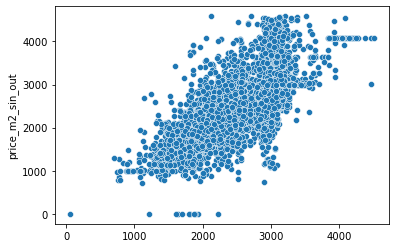

In [61]:
sns.scatterplot(y_pred_rid,y4_test);

In [62]:
list(zip(feature_cols, reg_ridge.coef_))

[('rooms_reg', 9.02445576630554),
 ('balcón', -0.13122675020836277),
 ('baulera', 43.90269612529901),
 ('cochera', 24.00136880637032),
 ('gimnasio', 21.0107972072245),
 ('gym', -0.04183732808923091),
 ('hidromasaje', 7.892325702642322),
 ('jacuzzi', 6.811098639592374),
 ('laundry', -25.97913661391253),
 ('lavadero', -13.931142407274702),
 ('luminoso', 6.526770599280852),
 ('mármol', -16.282367462595264),
 ('parrilla', -42.044856075407495),
 ('patio', -8.802827500331166),
 ('patios', 27.06376511442993),
 ('pileta', 39.55206737362272),
 ('piscina', 24.406936087777197),
 ('seguridad', 4.70153861324849),
 ('solarium', 7.572600746188832),
 ('sum', -23.05699463953918),
 ('terraza', 2.548499836943238),
 ('vigilancia', -9.254518408993597),
 ('apartment', 98.22779880965105),
 ('house', -27.296399502272067),
 ('agronomía', 51.32819026350678),
 ('almagro', -0.6055165629224603),
 ('balvanera', 13.629986789988708),
 ('barracas', -30.884210113126162),
 ('barrio norte', -14.042366061257365),
 ('belgr

statmodels

In [63]:
best_alpha = reg_ridge.alpha_
print("Best alpha: ", best_alpha)

#L1_wt : 0, the fit is ridge regression. 1, the fit is the lasso 

no_reg_model = sm.OLS(y4_train, X_train_sm)

reg_model = no_reg_model.fit_regularized(alpha = best_alpha, L1_wt = 0)

print("const: ",reg_model.params[0])
list(zip(feature_cols, reg_model.params[1:]))

Best alpha:  1.0
const:  508.1889274098135


[('rooms_reg', 40.94751698321536),
 ('balcón', -2.3978340012975585),
 ('baulera', 27.10399554197161),
 ('cochera', 15.888607718007247),
 ('gimnasio', 4.15413629957863),
 ('gym', -0.5867956509031058),
 ('hidromasaje', 3.8643084415979234),
 ('jacuzzi', 14.048228544495867),
 ('laundry', -14.408006232458911),
 ('lavadero', 8.8932645907739),
 ('luminoso', 5.637210664089148),
 ('mármol', 3.6075679173520268),
 ('parrilla', -15.24355036611609),
 ('patio', -0.257830418186903),
 ('patios', 19.247547551313463),
 ('pileta', 28.928341870451327),
 ('piscina', 24.688628940438342),
 ('seguridad', 17.475655252630197),
 ('solarium', 15.636100724559276),
 ('sum', 4.805432437781605),
 ('terraza', 4.063666326126804),
 ('vigilancia', 292.0108869298801),
 ('apartment', 477.36925205413917),
 ('house', -6.960734331221527),
 ('agronomía', 46.75492612691681),
 ('almagro', -0.04745527947191374),
 ('balvanera', 12.887835483935195),
 ('barracas', -0.8757524339182975),
 ('barrio norte', 0.4755766454955733),
 ('belgr

# Regresion Lineal Lasso

In [203]:
#LASSO
lm_lasso = linear_model.LassoCV(alphas = np.linspace(0.000001, 1,1000), cv=5)

reg_lasso = lm_lasso.fit(X_train_trans, y4_train)

y_pred_lasso = reg_lasso.predict(X_test_trans)


C:\ProgramData\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 509362306.23208416, tolerance: 522826.3545532803

C:\ProgramData\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 739061042.8932779, tolerance: 519495.67116777424

C:\ProgramData\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 594795219.1091487, tolerance: 524043.7937565883

C:\ProgramData\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning:

Objective did not converge. You might wan

In [204]:
print("Score reg_lasso - train: ",reg_lasso.score(X_train_trans, y4_train))
print("Score reg_lasso - test: ",reg_lasso.score(X_test_trans, y4_test))

Score reg_lasso - train:  0.582479495181694
Score reg_lasso - test:  0.5801671446893502


In [205]:
#Evaluo su rendimiento con el test
print ('MAE:', metrics.mean_absolute_error(y4_test, y_pred_lasso))
print ('MSE:', metrics.mean_squared_error(y4_test, y_pred_lasso))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, y_pred_lasso)))
print ('R2:', metrics.r2_score(y4_test, y_pred_lasso))

MAE: 288.87992683141533
MSE: 177233.00910120463
RMSE: 420.9905095144125
R2: 0.5801671446893502


In [206]:
list(zip(feature_cols, reg_lasso.coef_))

[('rooms_reg', 23.596592880730928),
 ('balcón', 6.370952199468267),
 ('baulera', 54.951744942931846),
 ('cochera', 30.66707380782202),
 ('gimnasio', 24.870932596860417),
 ('gym', 2.65429384240741),
 ('hidromasaje', 11.564634377929213),
 ('jacuzzi', 14.151695290813505),
 ('laundry', -13.795557879723946),
 ('lavadero', -3.567987998338073),
 ('luminoso', 11.66289910092482),
 ('mármol', -5.948175851166328),
 ('parrilla', -33.14145251537284),
 ('patio', -5.9697274724258795),
 ('patios', 34.552165233672476),
 ('pileta', 48.68156955221947),
 ('piscina', 33.80114464802059),
 ('seguridad', 13.897676918232428),
 ('solarium', 16.654162128196138),
 ('sum', -11.141297435735263),
 ('terraza', 7.438764773395536),
 ('vigilancia', -9.251355569415269),
 ('apartment', 98.23538667917744),
 ('house', -27.29549282883644),
 ('store', 51.33317825869251),
 ('agronomía', -0.45758059653487565),
 ('almagro', 14.715223546698581),
 ('balvanera', -30.02784317786113),
 ('barracas', -13.417293583332896),
 ('barrio nor

In [207]:
best_alpha = reg_lasso.alpha_
print("Best alpha: ", best_alpha)

#L1_wt : 0, the fit is ridge regression. 1, the fit is the lasso 

no_reg_model = sm.OLS(y4_train, X_train_sm)

reg_model = no_reg_model.fit_regularized(alpha = best_alpha, L1_wt = 1)

reg_model.params

Best alpha:  1e-06


const              2477.643113
balcón               42.571528
baulera              17.487461
cochera             158.478440
gimnasio            145.166518
                      ...     
villa soldati     -1832.529883
villa urquiza      -210.193519
cerca_lejos         -44.859163
distancia_subte      -0.040921
suma_amenities      -10.757038
Length: 90, dtype: float64

In [208]:
reg_model.params[reg_model.params.values == 0]

Series([], dtype: float64)

#### Comparamos Lasso y Ridge 

In [209]:
# Alpha 
print("Alpha Ridge: ", reg_ridge.alpha_)
print("Alpha Lasso: ", reg_lasso.alpha_)

# Score
print("Score del reg_ridge - test: ",reg_ridge.score(X_test_trans, y4_test))
print("Score reg_lasso - test: ",reg_lasso.score(X_test_trans, y4_test))


Alpha Ridge:  1e-06
Alpha Lasso:  1e-06
Score del reg_ridge - test:  0.580165773469685
Score reg_lasso - test:  0.5801671446893502


In [215]:
r2 = [['alpha', reg_ridge.alpha_,'Ridge'], 
      ['alpha', reg_lasso.alpha_,'Lasso'],
      ['score_train', reg_ridge.score(X_train_trans, y4_train),'Ridge'], 
      ['score_train', reg_lasso.score(X_train_trans, y4_train),'Lasso'],
      ['score_test', reg_ridge.score(X_test_trans, y4_test),'Ridge'], 
      ['score_test', reg_lasso.score(X_test_trans, y4_test),'Lasso']]

df_lasso_ridge = pd.DataFrame(r2, columns = ['Metrica', 'valor', 'Modelo'])
df_lasso_ridge

Metrica     valor Modelo
0        alpha  0.000001  Ridge
1        alpha  0.000001  Lasso
2  score_train  0.582480  Ridge
3  score_train  0.582479  Lasso
4   score_test  0.580166  Ridge
5   score_test  0.580167  Lasso

In [ ]:
df_lasso_ridge[df_lasso_ridge['Metrica'] == 'alpha']

In [114]:
fig = px.bar(data_frame = df_lasso_ridge[df_lasso_ridge['Metrica'] == 'alpha'], x = "Metrica", y = "valor",
             color = "Modelo", 
             color_discrete_map={'Ridge': 'lightseagreen','Lasso': 'darkseagreen'},
             barmode='group',
             title="Alpha por modelo", 
             width=400, height=500)

fig.show()

In [115]:
fig = px.bar(data_frame = df_lasso_ridge[df_lasso_ridge['Metrica'] != 'alpha'], x = "Metrica", y = "valor",
             color = "Modelo", 
             color_discrete_map={'Ridge': 'lightseagreen','Lasso': 'darkseagreen'},
             barmode='group',
             title="Score por modelo", 
             width=400, height=500)

fig.show()

In [116]:
# Betas 
list(zip(feature_cols, reg_ridge.coef_))

[('rooms_reg', 9.018829456689458),
 ('balcón', -0.13148462569086192),
 ('baulera', 43.900068905318896),
 ('cochera', 23.99780933922424),
 ('gimnasio', 21.007889182787725),
 ('gym', -0.0444280108506432),
 ('hidromasaje', 7.889371735489357),
 ('jacuzzi', 6.810334393703885),
 ('laundry', -25.980083031565492),
 ('lavadero', -13.932370742358584),
 ('luminoso', 6.5234459988071185),
 ('mármol', -16.282973638802996),
 ('parrilla', -42.04556669402657),
 ('patio', -8.80450781500231),
 ('patios', 27.07765988608729),
 ('pileta', 39.54953395903125),
 ('piscina', 24.4123968106932),
 ('seguridad', 4.697905526618816),
 ('solarium', 7.572098922943463),
 ('sum', -23.04831279200914),
 ('terraza', 2.5474216442458983),
 ('vigilancia', -9.251159081279685),
 ('apartment', 98.23472238591212),
 ('house', -27.296178274519818),
 ('store', 51.332315795231324),
 ('agronomía', -0.43239376878542657),
 ('almagro', 14.899740355829298),
 ('balvanera', -29.88181584785191),
 ('barracas', -13.310759104302317),
 ('barrio n

In [117]:
list(zip(feature_cols, reg_lasso.coef_))

[('rooms_reg', 23.596592880730928),
 ('balcón', 6.370952199468267),
 ('baulera', 54.951744942931846),
 ('cochera', 30.66707380782202),
 ('gimnasio', 24.870932596860417),
 ('gym', 2.65429384240741),
 ('hidromasaje', 11.564634377929213),
 ('jacuzzi', 14.151695290813505),
 ('laundry', -13.795557879723946),
 ('lavadero', -3.567987998338073),
 ('luminoso', 11.66289910092482),
 ('mármol', -5.948175851166328),
 ('parrilla', -33.14145251537284),
 ('patio', -5.9697274724258795),
 ('patios', 34.552165233672476),
 ('pileta', 48.68156955221947),
 ('piscina', 33.80114464802059),
 ('seguridad', 13.897676918232428),
 ('solarium', 16.654162128196138),
 ('sum', -11.141297435735263),
 ('terraza', 7.438764773395536),
 ('vigilancia', -9.251355569415269),
 ('apartment', 98.23538667917744),
 ('house', -27.29549282883644),
 ('store', 51.33317825869251),
 ('agronomía', -0.45758059653487565),
 ('almagro', 14.715223546698581),
 ('balvanera', -30.02784317786113),
 ('barracas', -13.417293583332896),
 ('barrio nor

In [118]:
list(zip(feature_cols4, model_lm4.coef_))


[('balcón', -2.7128178203679294),
 ('baulera', -24.904509043465502),
 ('cochera', 113.77125524848775),
 ('gimnasio', 100.78775034622015),
 ('gym', 164.70081876240846),
 ('hidromasaje', -24.774051911275336),
 ('jacuzzi', 50.363811048137904),
 ('laundry', 8.018587376870101),
 ('lavadero', -98.26147553233389),
 ('luminoso', -70.89254053756694),
 ('mármol', 19.88834812084947),
 ('parrilla', -78.92622780414752),
 ('patio', -188.2150913967885),
 ('patios', -132.08821910685515),
 ('pileta', 101.59203644795338),
 ('piscina', 126.22570000634924),
 ('seguridad', 66.10073198984536),
 ('solarium', -6.464054414112123),
 ('sum', 4.756915758359025),
 ('terraza', -91.42702376531156),
 ('vigilancia', -6.113017037523122),
 ('rooms_reg', -7.054994809222791),
 ('apartment', 330.90999546045737),
 ('house', -197.80769914393952),
 ('store', 305.7276542961306),
 ('agronomía', -16.397825150048813),
 ('almagro', 76.81728016889653),
 ('balvanera', -194.35034642037465),
 ('barracas', -119.39309461336178),
 ('barr

In [119]:
betas = pd.DataFrame(index= feature_cols)
betas["Lm"] = model_lm4.coef_
betas["Ridge"] = reg_ridge.coef_
betas["Lasso"] = reg_lasso.coef_

In [230]:
fig = px.bar(data_frame = betas[betas.Lm > 300], y = ["Lm","Ridge","Lasso"], x = betas[betas.Lm > 300].index, 
             title="Valor de beta en función del modelo", 
             color_discrete_map={'Lm': 'skyblue','Ridge': 'lightseagreen','Lasso': 'darkseagreen'},
             barmode="group",
            labels={
                     "value": "Beta",
                     "x": "Variable",
                     "variable": "Modelo"
                 },)

fig.show()

### Casos de uso - Sub y sobrevaluación

In [150]:
## Lasso: predecimos sobre total de data frame 

from sklearn.preprocessing import StandardScaler
scaler_precio = StandardScaler()
X_total_trans = scaler_precio.fit_transform(X4)


In [151]:
y_pred_lasso_total = reg_lasso.predict(X_total_trans)

In [152]:
y_pred_lasso_total = pd.Series(y_pred_lasso_total)
y_pred_lasso_total.colums = 'price_m2_sin_out_pred_lasso'
y_pred_lasso_total

0        1382.941682
1        1818.524306
2        1632.464298
3        3057.523737
4        3050.452294
            ...     
24317    2716.431261
24318    3086.966100
24319    3108.321451
24320    2539.484923
24321    2276.836599
Length: 24322, dtype: float64

In [153]:
dfLasso_pred = pd.concat([X4, dfCapi.price_m2_sin_out, y_pred_lasso_total], axis = 1)

In [154]:
dfLasso_pred

balcón  baulera  cochera  gimnasio  gym  hidromasaje  jacuzzi  laundry  \
0         0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   
1         0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   
2         0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   
3         0.0      0.0      0.0       0.0  0.0          0.0      0.0      1.0   
4         0.0      0.0      0.0       0.0  0.0          0.0      0.0      1.0   
...       ...      ...      ...       ...  ...          ...      ...      ...   
24317     0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   
24318     0.0      0.0      0.0       1.0  0.0          0.0      0.0      0.0   
24319     1.0      0.0      0.0       0.0  0.0          0.0      0.0      1.0   
24320     1.0      0.0      0.0       0.0  0.0          0.0      0.0      1.0   
24321     0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   

       lavadero  luminoso  ...  villa real  villa riachuelo  villa santa rita  \
0           0.0       0.0  ...         0.0              0.0               0.0   
1           0.0       0.0  ...         0.0              0.0               0.0   
2           0.0       0.0  ...         0.0              0.0               0.0   
3           0.0       1.0  ...         0.0              0.0               0.0   
4           0.0       1.0  ...         0.0              0.0               0.0   
...         ...       ...  ...         ...              ...               ...   
24317       1.0       1.0  ...         0.0              0.0               0.0   
24318       0.0       0.0  ...         0.0              0.0               0.0   
24319       0.0       0.0  ...         0.0              0.0               0.0   
24320       0.0       0.0  ...         0.0              0.0               0.0   
24321       0.0       0.0  ...         0.0              0.0               0.0   

       villa soldati  villa urquiza  cerca_lejos  distancia_subte  \
0                0.0            0.0            0          4728.39   
1                0.0            0.0            0          6073.15   
2                0.0            0.0            0          5305.63   
3                0.0            0.0            0           609.74   
4                0.0            0.0            0           609.74   
...              ...            ...          ...              ...   
24317            0.0            0.0            1           141.07   
24318            0.0            0.0            0             0.00   
24319            0.0            0.0            1            17.58   
24320            0.0            1.0            0           637.22   
24321            0.0            0.0            0             0.00   

       suma_amenities  price_m2_sin_out            0  
0                 1.0       1127.272727  1382.941682  
1                 0.0       1309.090909  1818.524306  
2                 0.0       1487.571343  1632.464298  
3                 3.0       3066.666667  3057.523737  
4                 3.0       3000.000000  3050.452294  
...               ...               ...          ...  
24317             3.0       1813.186813  2716.431261  
24318             1.0       3368.421053  3086.966100  
24319             2.0       3750.000000  3108.321451  
24320             4.0       2858.695652  2539.484923  
24321             0.0       1675.324675  2276.836599  

[24322 rows x 91 columns]

In [155]:
lista_col = list(dfLasso_pred.columns)
lista_col[len(lista_col)-1] = 'price_m2_sin_out_predLasso'
dfLasso_pred.columns = lista_col
dfLasso_pred

balcón  baulera  cochera  gimnasio  gym  hidromasaje  jacuzzi  laundry  \
0         0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   
1         0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   
2         0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   
3         0.0      0.0      0.0       0.0  0.0          0.0      0.0      1.0   
4         0.0      0.0      0.0       0.0  0.0          0.0      0.0      1.0   
...       ...      ...      ...       ...  ...          ...      ...      ...   
24317     0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   
24318     0.0      0.0      0.0       1.0  0.0          0.0      0.0      0.0   
24319     1.0      0.0      0.0       0.0  0.0          0.0      0.0      1.0   
24320     1.0      0.0      0.0       0.0  0.0          0.0      0.0      1.0   
24321     0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   

       lavadero  luminoso  ...  villa real  villa riachuelo  villa santa rita  \
0           0.0       0.0  ...         0.0              0.0               0.0   
1           0.0       0.0  ...         0.0              0.0               0.0   
2           0.0       0.0  ...         0.0              0.0               0.0   
3           0.0       1.0  ...         0.0              0.0               0.0   
4           0.0       1.0  ...         0.0              0.0               0.0   
...         ...       ...  ...         ...              ...               ...   
24317       1.0       1.0  ...         0.0              0.0               0.0   
24318       0.0       0.0  ...         0.0              0.0               0.0   
24319       0.0       0.0  ...         0.0              0.0               0.0   
24320       0.0       0.0  ...         0.0              0.0               0.0   
24321       0.0       0.0  ...         0.0              0.0               0.0   

       villa soldati  villa urquiza  cerca_lejos  distancia_subte  \
0                0.0            0.0            0          4728.39   
1                0.0            0.0            0          6073.15   
2                0.0            0.0            0          5305.63   
3                0.0            0.0            0           609.74   
4                0.0            0.0            0           609.74   
...              ...            ...          ...              ...   
24317            0.0            0.0            1           141.07   
24318            0.0            0.0            0             0.00   
24319            0.0            0.0            1            17.58   
24320            0.0            1.0            0           637.22   
24321            0.0            0.0            0             0.00   

       suma_amenities  price_m2_sin_out  price_m2_sin_out_predLasso  
0                 1.0       1127.272727                 1382.941682  
1                 0.0       1309.090909                 1818.524306  
2                 0.0       1487.571343                 1632.464298  
3                 3.0       3066.666667                 3057.523737  
4                 3.0       3000.000000                 3050.452294  
...               ...               ...                         ...  
24317             3.0       1813.186813                 2716.431261  
24318             1.0       3368.421053                 3086.966100  
24319             2.0       3750.000000                 3108.321451  
24320             4.0       2858.695652                 2539.484923  
24321             0.0       1675.324675                 2276.836599  

[24322 rows x 91 columns]

In [156]:
dfLasso_pred['price_vs_predLasso'] = np.where(dfLasso_pred['price_m2_sin_out_predLasso']> dfLasso_pred['price_m2_sin_out'], 'Oportunidad - subvaluado', 'Ok/sobrevaluado')

In [157]:
dfLasso_pred

balcón  baulera  cochera  gimnasio  gym  hidromasaje  jacuzzi  laundry  \
0         0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   
1         0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   
2         0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   
3         0.0      0.0      0.0       0.0  0.0          0.0      0.0      1.0   
4         0.0      0.0      0.0       0.0  0.0          0.0      0.0      1.0   
...       ...      ...      ...       ...  ...          ...      ...      ...   
24317     0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   
24318     0.0      0.0      0.0       1.0  0.0          0.0      0.0      0.0   
24319     1.0      0.0      0.0       0.0  0.0          0.0      0.0      1.0   
24320     1.0      0.0      0.0       0.0  0.0          0.0      0.0      1.0   
24321     0.0      0.0      0.0       0.0  0.0          0.0      0.0      0.0   

       lavadero  luminoso  ...  villa riachuelo  villa santa rita  \
0           0.0       0.0  ...              0.0               0.0   
1           0.0       0.0  ...              0.0               0.0   
2           0.0       0.0  ...              0.0               0.0   
3           0.0       1.0  ...              0.0               0.0   
4           0.0       1.0  ...              0.0               0.0   
...         ...       ...  ...              ...               ...   
24317       1.0       1.0  ...              0.0               0.0   
24318       0.0       0.0  ...              0.0               0.0   
24319       0.0       0.0  ...              0.0               0.0   
24320       0.0       0.0  ...              0.0               0.0   
24321       0.0       0.0  ...              0.0               0.0   

       villa soldati  villa urquiza  cerca_lejos  distancia_subte  \
0                0.0            0.0            0          4728.39   
1                0.0            0.0            0          6073.15   
2                0.0            0.0            0          5305.63   
3                0.0            0.0            0           609.74   
4                0.0            0.0            0           609.74   
...              ...            ...          ...              ...   
24317            0.0            0.0            1           141.07   
24318            0.0            0.0            0             0.00   
24319            0.0            0.0            1            17.58   
24320            0.0            1.0            0           637.22   
24321            0.0            0.0            0             0.00   

       suma_amenities  price_m2_sin_out  price_m2_sin_out_predLasso  \
0                 1.0       1127.272727                 1382.941682   
1                 0.0       1309.090909                 1818.524306   
2                 0.0       1487.571343                 1632.464298   
3                 3.0       3066.666667                 3057.523737   
4                 3.0       3000.000000                 3050.452294   
...               ...               ...                         ...   
24317             3.0       1813.186813                 2716.431261   
24318             1.0       3368.421053                 3086.966100   
24319             2.0       3750.000000                 3108.321451   
24320             4.0       2858.695652                 2539.484923   
24321             0.0       1675.324675                 2276.836599   

             price_vs_predLasso  
0      Oportunidad - subvaluado  
1      Oportunidad - subvaluado  
2      Oportunidad - subvaluado  
3               Ok/sobrevaluado  
4      Oportunidad - subvaluado  
...                         ...  
24317  Oportunidad - subvaluado  
24318           Ok/sobrevaluado  
24319           Ok/sobrevaluado  
24320           Ok/sobrevaluado  
24321  Oportunidad - subvaluado  

[24322 rows x 92 columns]

In [232]:
fig = px.scatter(dfLasso_pred[dfLasso_pred.price_m2_sin_out >0], x="price_m2_sin_out_predLasso", y="price_m2_sin_out", color="price_vs_predLasso", 
                color_discrete_map={'Oportunidad - subvaluado': 'lightseagreen','Ok/sobrevaluado': 'grey'}, 
                 title="Precio real vs predicción Lasso",
                labels={
                     "price_m2_sin_out": "Precio real (usd/m2)",
                     "price_m2_sin_out_predLasso": "Precio predicción (usd/m2)",
                     "price_vs_predLasso": "sub/sobrevaluado"
                 },)
fig.show()